# Στοχαστικές Διαδικασίες - 4η Εργαστηριακή Άσκηση

## Στοιχεία Φοιτητή:
* Ονοματεπώνυμο: Ιωάννης Δάρας
* Αριθμός Μητρώου: 03115018
* Σχολή: ΗΜΜΥ, ΕΜΠ
* Εξάμηνο: 8ο
* E-mail: daras.giannhs@gmail.com

## Στόχος εργαστηρίου

Στο εργαστήριο αυτό ασχολούμαστε με τους τυχαίους περιπάτους.

Μελετάμε τυχαίους περιπάτους τόσο στον $\mathbb Z$ όσο και στον $\mathbb Z^2$.

Στους περιπάτους αυτούς, μας ενδιαφέρουν χαρακτηριστικά όπως ο χρόνος πρώτης διαφυγής από ένα διάστημα στη μονοδιάστατη περίπτωση ή από έναν δίσκο στη δισδιάστατη. Ακόμη περισσότερο, μας ενδιαφέρουν τα στατιστικά χαρακτηριστικά που μπορούμε να αποκτήσουμε για το χρόνο πρώτης διαφυγής επαναλαμβάνοντας τον περιπάτο έναν μεγάλο αριθμό φορών.

Τέλος, σχεδιάζουμε γραφικές παραστάσεις που δίνουν μια οπτική εικόνα των μεταβολών των χαρακτηριστικών που μας ενδιαφέρουν στους διαφορετικούς περιπάτους.

## Imports & Configuration

Παρακάτω, κάνουμε import ορισμένες βιβλιοθήκες που θα χρειαστούμε στη συνέχεια της εργασίας.

In [1]:
import numpy as np
from numpy.random import choice
import matplotlib.pyplot as plt

Στη συνέχεια, ορίζουμε κάποιες global ρυθμίσεις για το εργαστήριο μας που αφορούν τα σχήματα του matplotlib.

In [2]:
# plot figures in jupyter notebook
%matplotlib inline
# figure size
plt.rcParams['figure.figsize'] = (10, 6)

Τέλος, για να είναι δυνατή η αναπαραγωγή των αποτελεσμάτων μας δίνουμε ένα συγκεκριμένο seed στο `numpy.random`.

In [3]:
np.random.seed(2019)

## Περίπατος στον $\mathbb Z$

Για να ορίσουμε τη στοχαστική διαδικασία που μοντελοποιεί έναν περίπατο στον $\mathbb Z$, χρησιμοποιούμε τον generator που φαίνεται παρακάτω.

Ο λόγος που χρησιμοποιούμε generator αντί για απλή συνάρτηση είναι ότι μέσω του generator μπορούμε να έχουμε αποθηκευμένο το state της στοχαστικής διαδικασίας στην τοπική μεταβλητή x του generator. 

Ένας άλλος τρόπος να πετύχουμε το ίδιο αποτέλεσμα θα ήταν να ορίζαμε μια κλάση για τη στοχαστική διαδικασία με μια μεταβλητή κλάσης x που θα κράταγε το state της διαδικασίας. Με μια αντίστοιχη λογική, υλοποιήθηκε η βιβλιοθήκη simple_markov_chain που χρησιμοποιούσαμε στα προηγούμενα εργαστήρια. 

Εδώ, για λόγους απλότητας, θα χρησιμοποιήσουμε τον ακόλουθο generator.

In [56]:
def rand_walk_Z(start = 0, probs = (0.5, 0.5)):
    x = start
    # probs order should be (left, right)
    steps = [-1, 1] 
    while True:
        x += choice(steps, p=probs)
        yield x

### Χρόνος διαφυγής από διάστημα $[a, b]$

Ορίζουμε ως χρόνο διαφυγής μιας στοχαστικής διαδικασίας στο χώρο καταστάσεων $\mathbb X$ το:


$$
T = \inf\{ k \in \mathbb N: \quad X_{k-1} \in [a, b] \subset \mathbb X \quad \wedge \quad  X_{k} \not \in [a,b]\}
$$


Υλοποιούμε την ακόλουθη συνάρτηση που υπολογίζει τις καταστάσεις που πέρασε η στοχαστική διαδικασία μέχρι να φύγει από το διάστημα $[a,b]$

In [5]:
def exit_time(a, b, walk_generator=rand_walk_Z, start=0, probs=(0.5, 0.5)):
    walker = walk_generator(start=start, probs=probs)
    chain = [start]
    x = start
    while a <= x <= b:
        y = next(walker)
        if abs(y-x)>1:
            raise ValueError('You said random walking, not random jumping!')
        else:
            x = y
        chain.append(x)
    return chain

#### Εφαρμογή βοηθητικού κώδικα: Γραφικές για 3 random walks

Για λόγους πληρότητας, αναπαράγουμε το πείραμα του βοηθητικού κώδικα που μας δίνεται για τα τρία random walks.

Μιας και αλλάξαμε το API, φτιάχνουμε και μια ακόμη συνάρτηση για να κάνει plots στο ίδιο γράφημα πολλές γραφικές παραστάσεις.

Η συνάρτηση αυτή, μεταξύ άλλων παίρνει και ένα όρισμα repeat.
Το repeat αυτό όρισμα ορίζει το πως πρέπει να συμπεριφερθεί η συνάρτηση αν τα chains είναι περισσότερα από τα colors.

In [6]:
def plot_multiple(chains, colors, a=None, b=None, alpha=0.8, xlabel='Time', ylabel='Position', repeat='split'):
    ''' 
    Plot multiple figures into one
    
    Args:
        chains: a list of lists of states
        colors: colors for plot
        a: interval start
        b: interval end
        alpha: transparency of plots
        xlabel, ylabel: labels
        repeat: repeat policy if len(chains) > len(colors)
    '''
    
    if len(chains) > len(colors):
        if repeat == 'split':
            repeat_per_color = len(chains) // len(colors)
            new_colors = []
            for color in colors:
                for i in range(repeat_per_color):
                    new_colors.append(color)
            colors = new_colors
        else:
            raise NotImplemented('This repeat policy is not supported')
        
    fig, ax = plt.subplots()
    for chain, col in zip(chains, colors):
        ax.plot(chain, color=col)
    
    if a is not None and b is not None:
        # colors configuration
        plt.axhspan(a, b, color='#cccccc', alpha=alpha)  # box between a & b
    
    ax.grid()
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    plt.show()

Με τις συναρτήσεις που φτιάξαμε, το πείραμα γίνεται απλά:

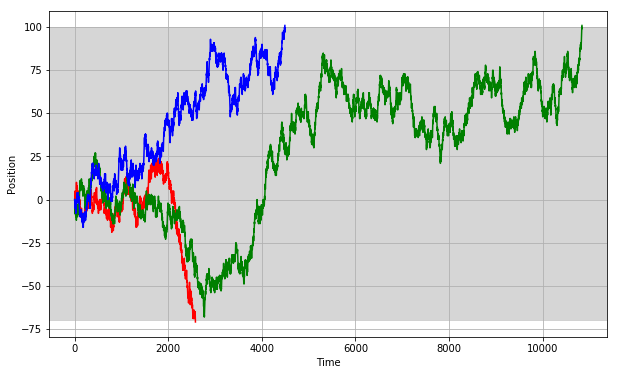

In [7]:
chain_1 = exit_time(a=-70, b=100)
chain_2 = exit_time(a=-70, b=100)
chain_3 = exit_time(a=-70, b=100)
plot_multiple([chain_1, chain_2, chain_3], ['red', 'green', 'blue'], a=-70, b=100)

### Άσκηση 1

Αφού έχουμε φτιάξει αυτές τις συναρτήσεις, η δουλειά μας πια είναι εύκολη.

In [8]:
chains = []
for i in range(1000):
    if i<500:
        chains.append(exit_time(a=-70, b=100, probs=(0.80, 0.20)))
    else:
        chains.append(exit_time(a=-70, b=100, probs=(0.2, 0.80)))

#### Ερώτηση 1

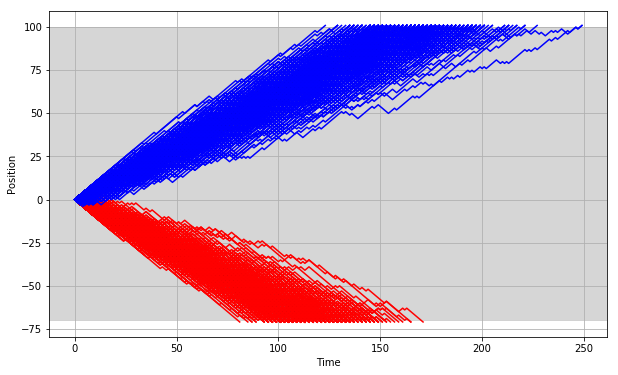

In [9]:
plot_multiple(chains, colors=['red', 'blue'], a=-70, b=100)

Η πρώτη παρατήρηση που έχουμε να κάνουμε είναι ότι όλες οι Μαρκοβιανές αλυσίδες εγκαταλείπουν τελικά το διάστημα $[-70, 100]$ όταν αρχίζουν από το state 0.

Μπορούμε να αποδείξουμε εύκολα ότι κάτι τέτοιο αναμέναμε να συμβεί. Πιο συγκεκριμένα, αν ξεκινάμε μέσα στο διάστημα $[-70, 100]$, όπως συμβαίνει στην περίπτωση μας, ο ορισμός του χρόνου πρώτης διαφυγής, $T = \inf\{ k \in \mathbb N: \quad X_{k-1} \in [a, b] \subset \mathbb X \quad \wedge \quad  X_{k} \not \in [a,b]\}
$, μπορεί να απλοποιηθεί στο:

$$
Τ_Α = \inf\{ k\in N: X_k \in A\}, \quad A = \{ k: k \not \in [a, b] \}
$$

Ο $T_A$ όμως είναι χρόνος πρώτης άφιξης άρα $h(x) = P_X[T_A < \infty]$ ικανοποιεί το πρόβλημα συνοριακών τιμών:

$$
\begin{cases}
Lh(x) = 0, \quad x \not \in A \\
h(x) = 1, \quad x \in A
\end{cases} \iff
$$


$$
\begin{cases}
h(x) = \sum_{y}p(x,y)h(y), \quad x \in [-70, 100] \\
h(-71) = h(100) = 1
\end{cases} \iff 
$$

$$
\begin{cases}
h(x) = 0.2\cdot h(x+1) + 0.8\cdot h(x-1), \quad x\in [-70, 100] \qquad (1)\\
h(-71) = h(100) = 1
\end{cases}
$$

Παρατηρούμε ότι η $h(x)=c$ αποτελεί λύση της (1).
Για c=1 όμως, ικανοποιεί και τις συνοριακές συνθήκες του προβλήματος. 
Άρα, η λύση στο πρόβλημα είναι $h(x) = 1, \forall x \in \mathbb N$.

Από το τελευταίο, προκύπτει ότι:
$$
h(0) = P[T_A < \infty |X_0 = 0] = 1
$$

Άρα, με πιθανότητα 1 η στοχαστική διαδικασία θα εγκαταλείψει το $[-70, 100]$, όπως ακριβώς παρατηρούμε και από το πείραμα.

Η δεύτερη παρατήρηση που κάνουμε είναι ότι καμία από τις αλυσίδες που έχει τάση προς τα αριστερά δεν πηγαίνει τελικά δεξιά και καμιά από τις αλυσίδες που έχει τάση προς τα δεξιά δεν πηγαίνει τελικά δεξιά. 

#### Ερώτηση 2

Στην ερώτηση αυτή, μας ζητείται να φτιάξουμε το ιστόγραμμα των χρόνων εξόδου για τις 1000 στοχαστικές διαδικασίες που φτιάξαμε πριν. 

Αρχικά, παρατηρούμε ότι μπορούμε να βρούμε εύκολα το χρόνο εξόδου από το μήκος της λίστας των καταστάσεων που πέρασε. Αυτό υλοποιείται στην ακόλουθη συνάρτηση.

In [10]:
def get_exit_time_from_states(chain):
    return len(chain) - 1

In [11]:
exit_times = [get_exit_time_from_states(chain) for chain in chains]
left_exit_times = exit_times[:500]
right_exit_times = exit_times[500:1000]

Στη συνέχεια, φτιάχνουμε μια συνάρτηση για να πλοτάρουμε τα ιστογράμματα, στο πρότυπο της συνάρτησης που μας δόθηκε στον βοηθητικό κώδικα.

In [12]:
def plot_histograms(times, colors, bins=30, edgecolor='black', density=True):
    for time, color in zip(times, colors):
        plt.hist(time, bins=bins, color=color, edgecolor=edgecolor, density=density)
    plt.xlabel('Time')
    plt.ylabel('Density')
    plt.show()

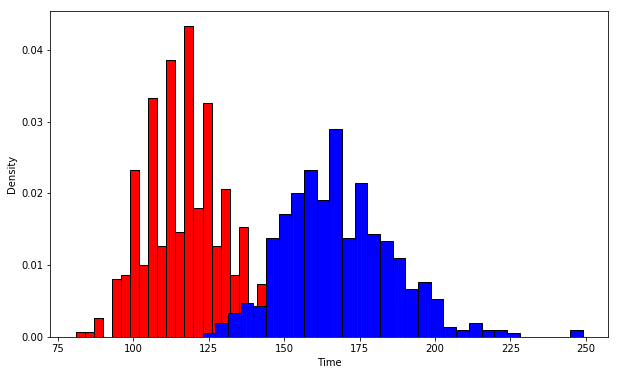

In [13]:
plot_histograms([left_exit_times, right_exit_times], colors=['red', 'blue'])

### Άσκηση 2

Ο περίπατος που μας ζητείται να κάνουμε εδώ είναι ένας περίπατος με έναν "τοίχο" στο 0, δηλαδή ένας περίπατος στο $\mathbb Z_+$. 

Για να προσομοιώσουμε αυτόν τον περίπατο, φτιάχνουμε την ακόλουθη συνάρτηση-γεννήτορα:


In [14]:
def wall_rand_walk_Z(start = 0, probs = (0.5, 0.5)):
    x = start
    # probs order should be (left, right)
    steps = [-1, 1] 
    while True:
        x += choice(steps, p=probs)
        x = max(x, 0)
        yield x

Προσομοιώνουμε την αλυσίδα 1000 φορές και κάθε φορά παρατηρούμε τη θέση της αλυσίδας μετά από 100 βήματα.

In [15]:
walks_100 = []
for i in range(1000):
    walker = wall_rand_walk_Z(start=0, probs=(2/3, 1/3))
    x = 0
    for j in range(100):
        x = next(walker)
    walks_100.append(x)

#### Ερώτηση 1

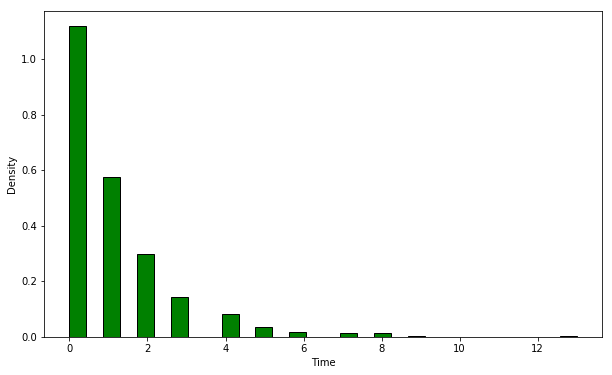

In [16]:
plot_histograms([walks_100], ['green'], bins=30)

#### Ερώτηση 2

In [17]:
maxs = []
for i in range(1000):
    walker = wall_rand_walk_Z(start=0, probs=(2/3, 1/3))
    x = 0
    local_max = 0
    for j in range(1000):
        x = next(walker)
        if (x > local_max): local_max = x
    maxs.append(local_max)

Μέση τιμή και διασπορά:

In [18]:
print('Average maximum distance from 0 in 1000 iterations: {}'.format(np.average(maxs)))
print('Variance of maximum distance from 0 in 1000 iterations: {}'.format(np.var(maxs)))

Average maximum distance from 0 in 1000 iterations: 7.659
Variance of maximum distance from 0 in 1000 iterations: 3.160719


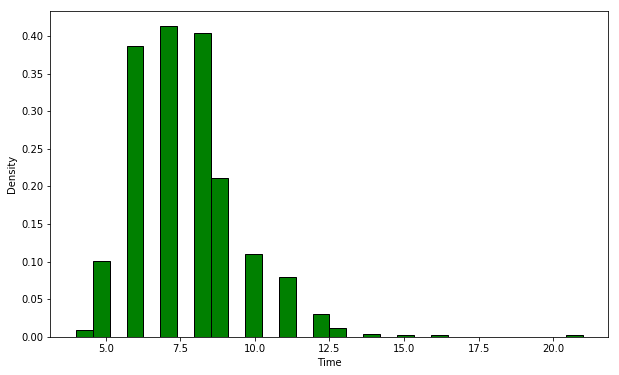

In [19]:
plot_histograms([maxs], ['green'], bins=30)

## Περίπατος στον $\mathbb Z^2$


Σε αυτό το μέρος του εργαστηρίου μελετάμε έναν περίπατο στον $\mathbb Z^2$.
Πιο συγκεκριμένα, κάθε φορά με πιθανότητα 1/4 αυξάνεται κατά ένα το x, με πιθανότητα 1/4 αυξάνεται κατά 1 το y, με πιθανότητα 1/4 μειώνεται κατά ένα το x και με πιθανότητα 1/4 μειώνεται κατά 1 το y.

Μια υλοποίηση αυτής της στοχαστικής διαδικασίας δίνεται παρακάτω (από τον βοηθητικό κώδικα του εργαστηρίου):

In [20]:
def rand_walk_Z2(start=(0, 0), probs=(0.25, 0.25, 0.25, 0.25)):
    # probs order (left, right, bottom, up)
    x, y = start
    steps = [(-1, 0), (1, 0), (0, -1), (0, 1)]
    while True:
        dx, dy = steps[choice(4, p=probs)]
        x, y = x + dx, y + dy
        yield x, y

Μας ενδιαφέρει να μελετήσουμε τις ιδιότητες του χρόνου εξόδου της στοχαστικής αυτής διαδικασίας από δίσκο ακτίνας r.

Φτιάχνουμε μια συνάρτηση get_exit_time για περιπάτους στον $\mathbb Z^2$ που μας επιστρέφει τον χρόνο εξόδου από έναν δίσκο ακτίνας r. 

In [51]:
def get_exit_time_Z2(r, walk_generator=rand_walk_Z2, start=(0, 0), probs=(0.25, 0.25, 0.25, 0.25)):
    walker = walk_generator(start=start, probs=probs)
    x, y = start
    rounds = 0
    while x**2 + y**2 <= r**2:
        x, y = next(walker)
        rounds += 1
    return rounds

Στη συνέχεια, τρέχουμε 500 πειράματα για κάθε μία από 10 διαφορετικές ακτίνες και βρίσκουμε το μέσο χρόνο εξόδου για την κάθε μία.

In [52]:
R = np.arange(10, 110, 10)
averaged_exit_times = []
for r in R:
    exit_times = []
    for i in range(500):
        exit_times.append(get_exit_time_Z2(r))
    averaged_exit_times.append(np.average(exit_times))

Σε λογαριθμική κλίμακα, παριστάνουμε τα αποτελέσματα:

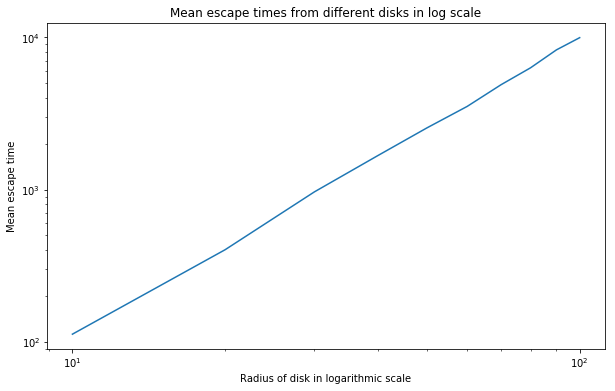

In [55]:
fig, ax = plt.subplots()
plt.xlabel('Radius of disk in logarithmic scale')
plt.ylabel('Mean escape time')
plt.title('Mean escape times from different disks in log scale')
plt.loglog(R, averaged_exit_times)
plt.show()

Παρατηρούμε, ότι στη λογαριθμική κλίμακα ο μέσος χρόνος εξόδου και η ακτίνα του δίσκου συνδέονται με σχέση ευθείας.
Θα χρησιμοποιήσουμε τη συνάρτηση `polyfit` του `numpy` για να προσδιορίσουμε την κλίση και τη σταθερά της ευθείας αυτής.

In [61]:
a, b = np.polyfit(np.log(R), np.log(averaged_exit_times), 1)
print(a, b)

1.9537682831982053 0.19913371644351374


Παραπάνω, μελετήσαμε πειραματικά τον χρόνο πρώτης διαφυγής από δίσκους ακτίνας R.
Για το χρόνο πρώτης διαφυγής δε γνωρίζουμε όμως θεωρήματα που μπορούμε να εκμεταλλευτούμε.
Ένα καλό τρίκ είναι να μεταφράσουμε το χρόνο διαφυγής, σε χρόνο πρώτης άφιξης, όπως ακριβώς κάναμε και στους περιπάτους στο $\mathbb Z$.

Έστω: $$A = \{r \in N: r^2 >R\}$$

Ο χρόνος:
$$
T_A(R) = \inf\{k\in N: X_k^2 + Y_k^2 \in A \}
$$

είναι χρόνος πρώτης άφιξης για τη στοχαστική διαδικασία $U_k = X_k^2 + Y_k^2$ που αποτελεί όμως ταυτόχρονα και το χρόνο διαφυγής από το σύνολο $B = \{ r \in N: r^2 \leq R\}$, τον οποίο μελετήσαμε πειραματικά παραπάνω.

Γνωρίζουμε όμως ότι η μέση τιμή του χρόνου πρώτης άφιξης ικανοποιεί το πρόβλημα συνοριακών τιμών:

$$
\begin{cases}
L\textrm{g(x)}= -1, \quad x \not \in A, \\
g(x) = 0, \quad x \in A
\end{cases} \iff 
$$

$$
\begin{cases}
-g(x) + \sum_{y}p(x,y)g(y)=-1, \quad x \not \in A \\
g(x) = 0, \quad x \in A
\end{cases}
$$

Υπολογίζοντας το p(x,y) για τα διάφορα R, μπορούμε να λύσουμε και θεωρητικά το πρόβλημα από την αναδρομική σχέση και να επιβεβαιώσουμε το αποτέλεσμα.